# DDPG - OPENAI - Bipedal Walker

## Train file

In [1]:
from __future__ import division
import gym
from gym.wrappers import Monitor
from tqdm import *

import numpy as np
import torch
from torch.autograd import Variable


import agent
import utils
from main import *

In [2]:


env = gym.make('BipedalWalker-v3')
#env = Monitor(env, './video', video_callable=lambda episode_id: True,force = True)
env.seed(1)

num_epochs = 1200
max_steps = 1000
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
a_high = env.action_space.high[0]
init_var = 0.003
batch_size = 128
max_memory_size = 1000000
lrs = [0.001,0.001]
taus = [0.003, 0.003]
gamma = 0.99
weight_decays = [1e-5,1e-5]
seed = 0


trainer = agent.Agent(state_dim, action_dim, a_high, lrs, taus, gamma, init_var, weight_decays, batch_size, max_memory_size, seed)

/home/monokuma/Logiciels/Gym/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
main = Main(env,trainer, num_epochs, max_steps, train = True, print_ =False, save_models = True)

  0%|          | 0/1200 [00:00<?, ?it/s]/home/monokuma/Documents/Reinforcement learning/OPENAI_resolutions/SIMPLE_DDPG/agent.py:80: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_critic = F.smooth_l1_loss(y_predicted, y_expected)
Episode reward: -34.57319135997004, Survived steps: 249, Best reward: 317.84151291752477: 100%|██████████| 1200/1200 [11:43:54<00:00, 35.20s/it]   

End of Main experiment


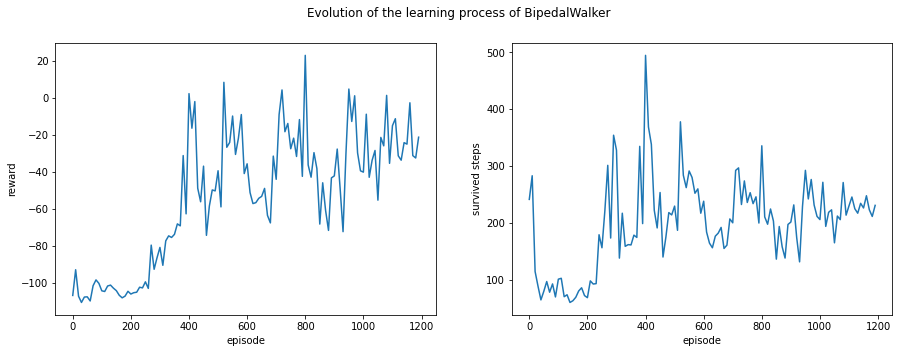

In [6]:
rewards, steps = main.Rewards, main.Steps
plot_frequency = 10
plotResults(rewards, steps,plot_frequency )